Import the necessary libraries

In [150]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import scipy
from matplotlib import pyplot as plt

Request scraping from the website and initialize a BeautifulSoup object

In [151]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
bs = BeautifulSoup(opened_webpage.content, "html.parser")

Webpage loaded and parsed successfully...


Find all the tables on the website and add them as a string to a list. Since I am only concerned with the first table I extracted that table from the list of tables and stored it in a variable called table_1

In [ ]:
raw_data = []

table = bs.find_all("table")
count = 0

for row in table[1]:
    line = row.text
    raw_data.append(line)

table_1 = raw_data[1]
print(table_1)

Split the string that contais all the data of table 1 on a double newline.
Create a new clean list that stores the data by removing extraneous newlines.

In [153]:
#split string on double new line to get each cell as its own list item
df_list = table_1.split("\n\n")
#create a clean list with each cell with no newline characters
new_df_list = []
for data in df_list:
  clean_data = data.replace("\n","")
  new_df_list.append(clean_data)
new_df_list

Iterate through a list containing all data and add each row of data to a list, which will be appended to a list containing all rows

In [ ]:
rows = []
counter = 0
current_row = []
for i in range(0, len(new_df_list)):
  counter +=1
  if counter < 6:
    current_row.append(new_df_list[i])
  else:
    current_row.append(new_df_list[i])
    rows.append(current_row)
    current_row = []
    counter = 0

Create a list of column names by extracting the first list from list of rows.
The rest of the lists in the list will be our body of data.

In [ ]:
column_names = rows[0]

data_body = rows[1:(len(rows)+1)]

Put our clean list of lists which contain data from each of the rows into a dataframe, passing in the column names to specify.

In [154]:
raw_df = pd.DataFrame(data_body, columns = column_names)
raw_df

,Rank,City proper/metropolitan area,Country/region,Official est. GDPup to date(billion US$),Metropolitan population,Official est. GDP per capita
0,300+,"Abbotsford, British Columbia",Canada,6.141 (2019)[7],"202,497 (2019)[8]","30,321.44"
1,300+,Aberdeen,United Kingdom,23.0 (2020)[9],"489,840 (2020)[10]","46,957.94"
2,300+,Abidjan,Ivory Coast,27 (2017)[11],"5,950,000 (2022)[12]","4,537.82"
3,110,Abu Dhabi,United Arab Emirates,119 (2015)[13],"1,660,000 (2022)[12]","71,686.75"
4,203,Adelaide,Australia,64.461 (2018–19)[14],"1,380,000 (2022)[12]","46,710.87"
...,...,...,...,...,...,...
714,300+,Padua–Treviso–Venice metropolitan area,Italy,34.837 (2020)[161][162],"2,748,420 (2020)[186]","12,676.37"
715,300+,Verona metropolitan area,Italy,34.152 (2020)[161][162],"915,975 (2020)[187]","37,282.68"
716,300+,Heidelberg,Germany,34.038 (2020)[161][162],"1,544,830 (2020)[188]","22,034.79"
717,300+,Murcia,Spain,33.923 (2020)[161][162],"1,528,828 (2020)[189]","22,186.93"


Checking for duplicate data

In [155]:
number_of_duplicates = raw_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

 Number of duplicates before : 0


In [156]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Rank                                      719 non-null    object
 1   City proper/metropolitan area             719 non-null    object
 2   Country/region                            719 non-null    object
 3   Official est. GDPup to date(billion US$)  719 non-null    object
 4   Metropolitan population                   719 non-null    object
 5   Official est. GDP per capita              719 non-null    object
dtypes: object(6)
memory usage: 33.8+ KB


Remove rows with missing GDP data.

In [157]:
clean_df = raw_df.drop(raw_df[raw_df['Official est. GDPup to date(billion US$)'] == ''].index)
clean_df

,Rank,City proper/metropolitan area,Country/region,Official est. GDPup to date(billion US$),Metropolitan population,Official est. GDP per capita
0,300+,"Abbotsford, British Columbia",Canada,6.141 (2019)[7],"202,497 (2019)[8]","30,321.44"
1,300+,Aberdeen,United Kingdom,23.0 (2020)[9],"489,840 (2020)[10]","46,957.94"
2,300+,Abidjan,Ivory Coast,27 (2017)[11],"5,950,000 (2022)[12]","4,537.82"
3,110,Abu Dhabi,United Arab Emirates,119 (2015)[13],"1,660,000 (2022)[12]","71,686.75"
4,203,Adelaide,Australia,64.461 (2018–19)[14],"1,380,000 (2022)[12]","46,710.87"
...,...,...,...,...,...,...
713,300+,Ingolstadt,Germany,35.637 (2020)[161][162],"197,560 (2020)[185]","180,400.89"
714,300+,Padua–Treviso–Venice metropolitan area,Italy,34.837 (2020)[161][162],"2,748,420 (2020)[186]","12,676.37"
715,300+,Verona metropolitan area,Italy,34.152 (2020)[161][162],"915,975 (2020)[187]","37,282.68"
716,300+,Heidelberg,Germany,34.038 (2020)[161][162],"1,544,830 (2020)[188]","22,034.79"


Write a function to convert numeric data into datatype float so that it may be used in analysis.

In [158]:

def clean_and_convert(info):
  if "(" in info:
    list_1 = info.split("(")
    clean_info = list_1[0]
    clean_info = clean_info.replace(",", '')
    clean_info = clean_info.replace("+", '')
    clean_info = float(clean_info)
    return clean_info
  elif "[" in info:
    list_1 = info.split("[")
    clean_info = list_1[0]
    clean_info = clean_info.replace(",", '')
    clean_info = clean_info.replace("+", '')
    clean_info = float(clean_info)
    return clean_info
  else:
    clean_info = info.replace(",", '')
    clean_info = float(clean_info)
    return clean_info



Appl the clean and convert function to columns with numeric data of interest

In [159]:
clean_df["Official est. GDPup to date(billion US$)"] = clean_df["Official est. GDPup to date(billion US$)"].apply(clean_and_convert)
clean_df["Metropolitan population"] = clean_df["Metropolitan population"].apply(clean_and_convert)
clean_df["Official est. GDP per capita"] = clean_df["Official est. GDP per capita"].apply(clean_and_convert)

In [160]:
clean_df

,Rank,City proper/metropolitan area,Country/region,Official est. GDPup to date(billion US$),Metropolitan population,Official est. GDP per capita
0,300+,"Abbotsford, British Columbia",Canada,6.141,202497.0,30321.44
1,300+,Aberdeen,United Kingdom,23.000,489840.0,46957.94
2,300+,Abidjan,Ivory Coast,27.000,5950000.0,4537.82
3,110,Abu Dhabi,United Arab Emirates,119.000,1660000.0,71686.75
4,203,Adelaide,Australia,64.461,1380000.0,46710.87
...,...,...,...,...,...,...
713,300+,Ingolstadt,Germany,35.637,197560.0,180400.89
714,300+,Padua–Treviso–Venice metropolitan area,Italy,34.837,2748420.0,12676.37
715,300+,Verona metropolitan area,Italy,34.152,915975.0,37282.68
716,300+,Heidelberg,Germany,34.038,1544830.0,22034.79


Save the data frame as csv

In [168]:
clean_df.to_csv("GDP_by_metro_area.csv")

Describe and visualize columns of numeric data

In [161]:
clean_df["Official est. GDPup to date(billion US$)"].describe()

count     685.000000
mean       77.850714
std       166.793705
min         0.009406
25%         8.597000
50%        25.508000
75%        73.876000
max      2080.758000
Name: Official est. GDPup to date(billion US$), dtype: float64

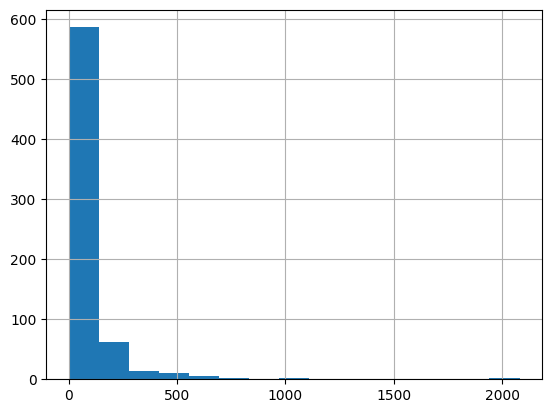

In [162]:
hist1 = clean_df["Official est. GDPup to date(billion US$)"].hist(bins = 15)

In [109]:
clean_df["Metropolitan population"].describe()

count    6.850000e+02
mean     2.331845e+06
std      4.477432e+06
min      5.440000e+02
25%      1.824840e+05
50%      5.472070e+05
75%      2.352426e+06
max      4.070000e+07
Name: Metropolitan population, dtype: float64

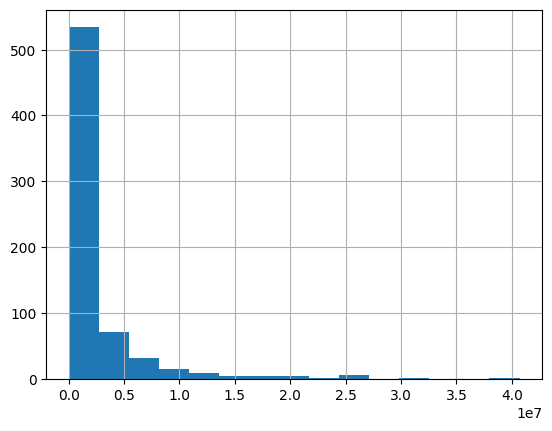

In [118]:
hist2 = clean_df["Metropolitan population"].hist(bins = 15)

In [113]:
clean_df["Official est. GDP per capita"].describe()

count       685.000000
mean      50057.609406
std       36140.726466
min        1297.300000
25%       35825.570000
50%       48147.000000
75%       61611.000000
max      557676.570000
Name: Official est. GDP per capita, dtype: float64

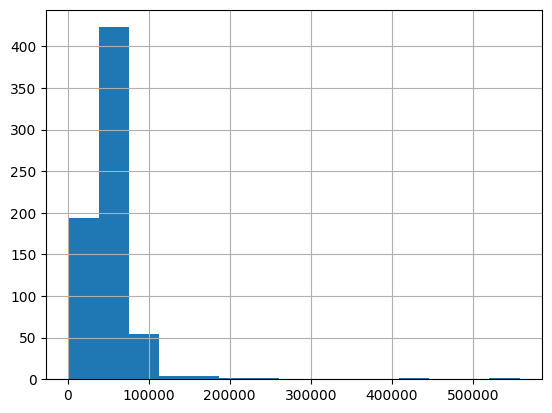

In [117]:
hist3 = clean_df["Official est. GDP per capita"].hist(bins = 15)

Calculate the correlation coefficient of Official GDP and Metropolitan population

In [120]:
from scipy.stats import pearsonr

p = pearsonr(clean_df["Official est. GDPup to date(billion US$)"], clean_df["Metropolitan population"])
print (p[0])

0.6786692031439296


The pearson correlation coefficient between estimated GDP and Metropolitan populaton is moderately strong, positive correlation. This means that when metropolitan population goes up, we can expect estimated GDP to go up by a factor of 0.678.

Visualize this coefficient with a scatterplot comparing GDP by Metropolitan area

Text(0.5, 1.0, 'GDP by population of metropolitan center')

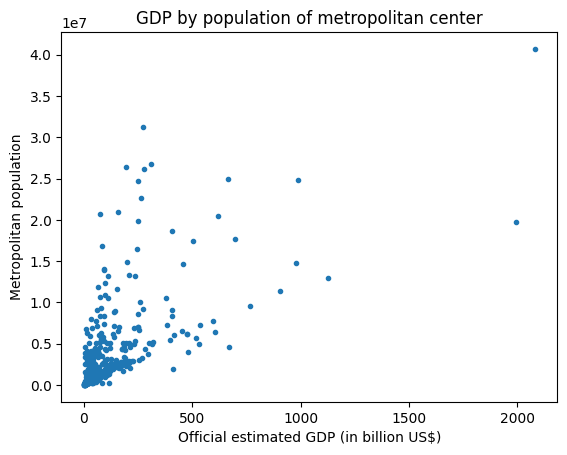

In [133]:
gdp_column = clean_df["Official est. GDPup to date(billion US$)"]
population_column = clean_df["Metropolitan population"]

plt.scatter(gdp_column,population_column, s = 9)

plt.xlabel("Official estimated GDP (in billion US$)")
plt.ylabel("Metropolitan population")

plt.title("GDP by population of metropolitan center")

This scatterplot shows the relationship between GDP and population, which shows the correlation calculated above. It shows that as a general trend, higher GDPs are related to higher metropolitan populations. However, most there is a large variance in the data, and the data are not tightly concentrated around an estimated best fit line, which shows that the correlation is not exactly one to one and likely there are many other factors which effect the relationship between GDP and population.

Sort the data frame by the official GDP in descending order

In [135]:
sorted_df = clean_df.sort_values(by = ['Official est. GDPup to date(billion US$)'], ascending = False)
sorted_df

,Rank,City proper/metropolitan area,Country/region,Official est. GDPup to date(billion US$),Metropolitan population,Official est. GDP per capita
234,1,Tokyo,Japan,2080.758000,40700000.0,51124.283
268,2,"New York-Newark-Jersey City, NY-NJ-PA Metropol...",United States,1992.779000,19768458.0,100806.000
278,3,"Los Angeles-Long Beach-Anaheim, CA MSA",United States,1124.682000,12997353.0,86532.000
204,4,Seoul,South Korea,986.940000,24800000.0,39795.600
135,5,London,United Kingdom,978.402000,14800000.0,66108.240
...,...,...,...,...,...,...
642,300+,"Sebring-Avon Park, FL MSA",United States,2.894000,103296.0,28017.000
610,300+,"Lewiston, ID-WA MSA",United States,2.676000,64851.0,41264.000
194,300+,San Marino,San Marino,1.807000,34000.0,52949.650
55,300+,Cocos (Keeling) Islands,Cocos (Keeling) Islands,0.011013,544.0,20243.660


Create a bar graph of the cities with the top 15 GDPs

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Tokyo'),
  Text(1, 0, 'New York-Newark-Jersey City, NY-NJ-PA Metropolitan Statistical Area'),
  Text(2, 0, 'Los Angeles-Long Beach-Anaheim, CA MSA'),
  Text(3, 0, 'Seoul'),
  Text(4, 0, 'London'),
  Text(5, 0, 'Paris metropolitan area'),
  Text(6, 0, 'Chicago-Naperville-Elgin, IL-IN-WI MSA'),
  Text(7, 0, 'Osaka–Kobe'),
  Text(8, 0, 'San Francisco-Oakland-Berkeley, CA MSA'),
  Text(9, 0, 'Shanghai'),
  Text(10, 0, 'Beijing'),
  Text(11, 0, 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'),
  Text(12, 0, 'Dallas-Fort Worth-Arlington, TX MSA'),
  Text(13, 0, 'Houston-The Woodlands-Sugar Land, TX MSA'),
  Text(14, 0, 'Boston-Cambridge-Newton, MA-NH MSA')])

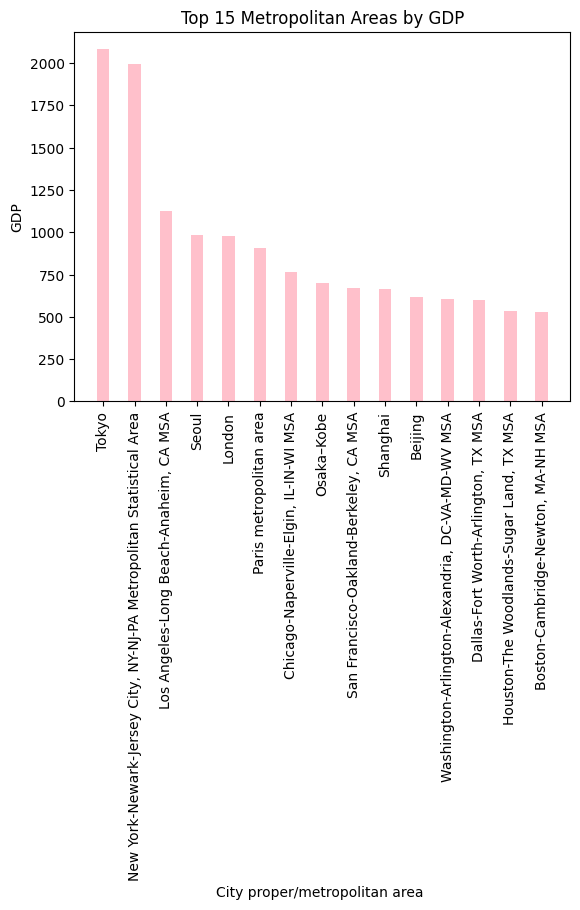

In [166]:
top_15_gdp = sorted_df["Official est. GDPup to date(billion US$)"][0:15]
city_15 = sorted_df["City proper/metropolitan area"][0:15]

plt.bar(city_15, top_15_gdp, color ='pink', width = 0.4)
# Now add axis labels with units
plt.xlabel("City proper/metropolitan area ")
plt.ylabel("GDP")

# We can add a title too
plt.title("Top 15 Metropolitan Areas by GDP")

plt.xticks(rotation=90)

This graph shows the top 15 metropolitan areas by GDP. We can see a difference between the top two metropolitan areas and the other 13, showing a large variance even in the  metropolitan areas with the highest GDP.